<a href="https://colab.research.google.com/github/ArtemLatyshev1/lab6RO/blob/main/Mnist_Latyshev_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание объектов на изображениях из набора данных mnist с помощью сверточных нейронных сетей

In [ ]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=eedba040e0c7ead7ac0f809fb21ad0a64fb2b966eb1d7e3018d364483981cb7c
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 28, 28
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных mnist
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Подготовка данных

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Просмотр примеров данных**

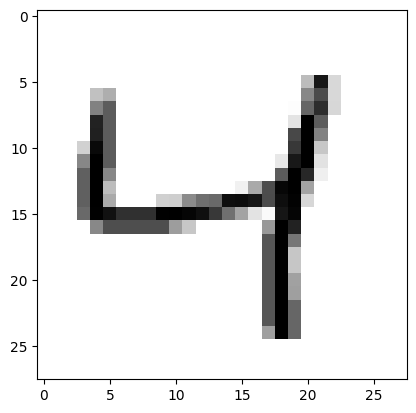

Номер класса: 4
Тип объекта: 4


In [ ]:
n = 2
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n]])

**Нормализуем данные**

In [ ]:
from keras.utils import to_categorical
x_train = x_train / 255.0
x_test = x_test / 255.0

**Преобразуем правильные ответы в формат one hot encoding**

In [ ]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(28, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(28, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(56, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(224, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

Dropout - техника борьбы с переобучением, когда с заданной вероятностью отключаются нейроны.

**Печатаем информацию о сети**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 56)        14168     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 56)        28280     
                                                        

**Компилируем модель**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
422/422 - 10s - loss: 1.5808 - accuracy: 0.4477 - val_loss: 0.3406 - val_accuracy: 0.9102 - 10s/epoch - 23ms/step
Epoch 2/25
422/422 - 4s - loss: 0.4894 - accuracy: 0.8433 - val_loss: 0.1616 - val_accuracy: 0.9568 - 4s/epoch - 9ms/step
Epoch 3/25
422/422 - 4s - loss: 0.3248 - accuracy: 0.8982 - val_loss: 0.1217 - val_accuracy: 0.9668 - 4s/epoch - 8ms/step
Epoch 4/25
422/422 - 3s - loss: 0.2618 - accuracy: 0.9188 - val_loss: 0.1020 - val_accuracy: 0.9690 - 3s/epoch - 8ms/step
Epoch 5/25
422/422 - 3s - loss: 0.2256 - accuracy: 0.9296 - val_loss: 0.0900 - val_accuracy: 0.9740 - 3s/epoch - 8ms/step
Epoch 6/25
422/422 - 4s - loss: 0.1974 - accuracy: 0.9380 - val_loss: 0.0819 - val_accuracy: 0.9747 - 4s/epoch - 8ms/step
Epoch 7/25
422/422 - 3s - loss: 0.1777 - accuracy: 0.9448 - val_loss: 0.0766 - val_accuracy: 0.9767 - 3s/epoch - 8ms/step
Epoch 8/25
422/422 - 3s - loss: 0.1678 - accuracy: 0.9487 - val_loss: 0.0712 - val_accuracy: 0.9790 - 3s/epoch - 8ms/step
Epoch 9/25
422/422 - 

## Оцениваем качество обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(x_test, y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 98.78%


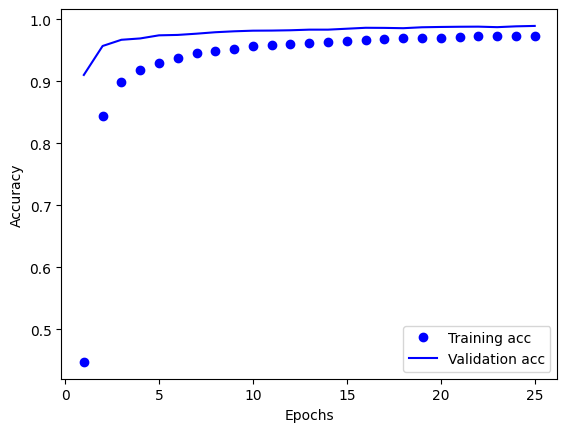

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model_json = model.to_json()
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("mnist_model.weights.h5")

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

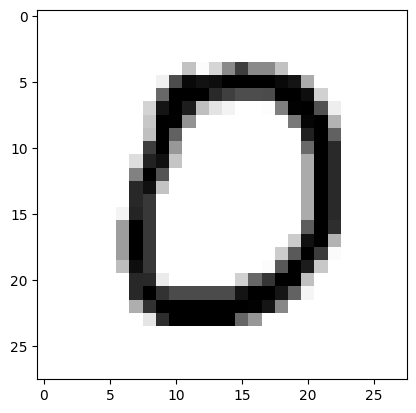

In [ ]:
index=10
plt.imshow(x_test[index], cmap=plt.cm.binary)
plt.show()

**Преобразование тестового изображения**

In [ ]:
x = x_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 1s 884ms/step


**Печатаем результаты распознавания**

In [ ]:
print(prediction)

[[9.99999523e-01 2.59109345e-10 3.64672246e-07 4.26883862e-10
  2.55991357e-11 2.37263453e-09 3.53440122e-08 7.35782546e-09
  2.20228742e-08 1.17846525e-07]]


**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

0


**Печатаем правильный ответ**

In [ ]:
print(classes[np.argmax(y_test[index])])

0


## Распознаем cвои изображения

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving 9.jpg to 9.jpg
Saving 8.jpg to 8.jpg
Saving 7.jpg to 7.jpg
Saving 6.jpg to 6.jpg
Saving 5.jpg to 5.jpg
Saving 4.jpg to 4.jpg
Saving 3.jpg to 3.jpg
Saving 2.jpg to 2.jpg
Saving 1.jpg to 1.jpg
Saving 0.jpg to 0.jpg


{'9.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x11(Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01;\x00\x02\x00\x00\x00-\x00\x00\x08J\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08x\x9c\x9d\x00\x01\x00\x00\x000\x00\x00\x10\xf0\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00>\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

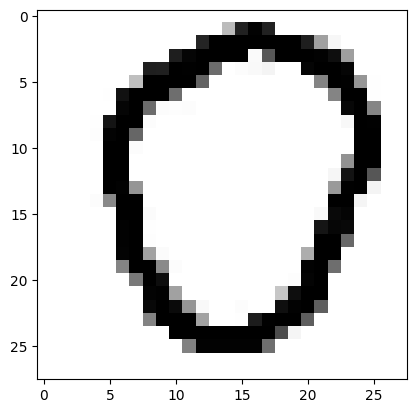

1/1 [==============================] - 0s 17ms/step
Номер класса: 0
Название класса: 0


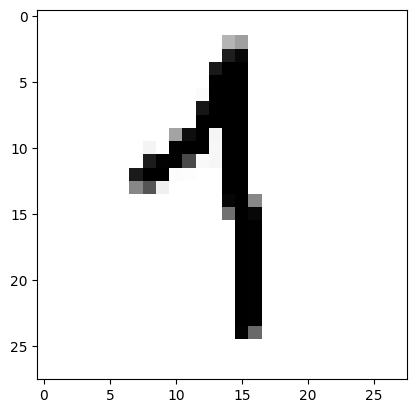

1/1 [==============================] - 0s 17ms/step
Номер класса: 1
Название класса: 1


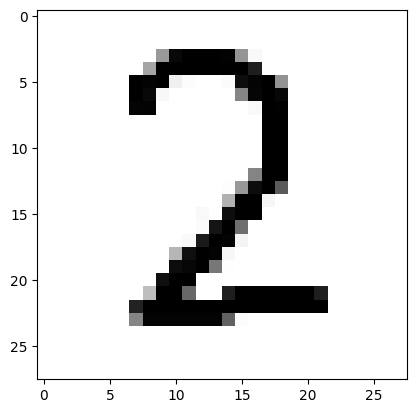

1/1 [==============================] - 0s 17ms/step
Номер класса: 2
Название класса: 2


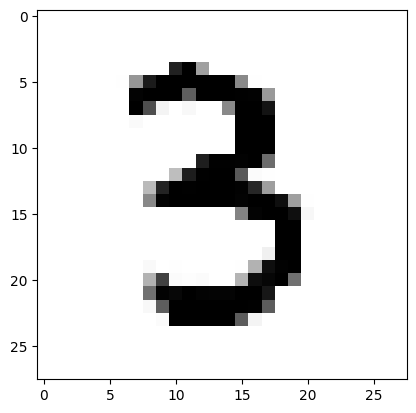

1/1 [==============================] - 0s 17ms/step
Номер класса: 3
Название класса: 3


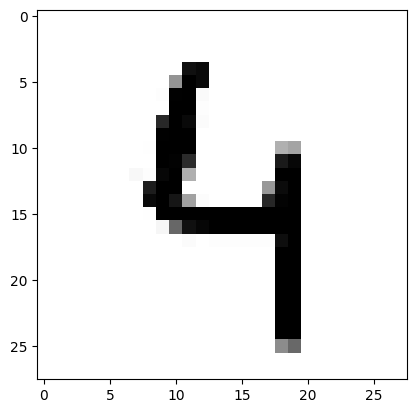

1/1 [==============================] - 0s 17ms/step
Номер класса: 4
Название класса: 4


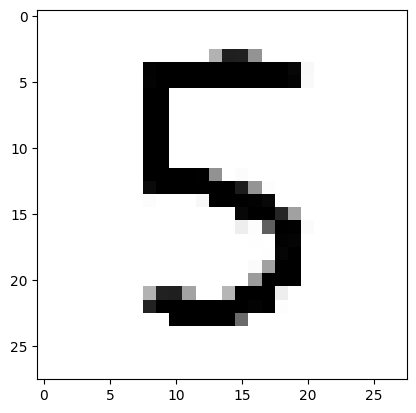

1/1 [==============================] - 0s 19ms/step
Номер класса: 5
Название класса: 5


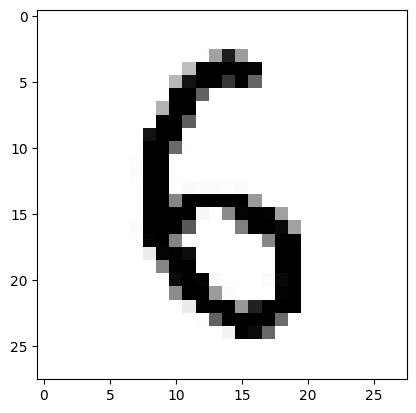

1/1 [==============================] - 0s 41ms/step
Номер класса: 6
Название класса: 6


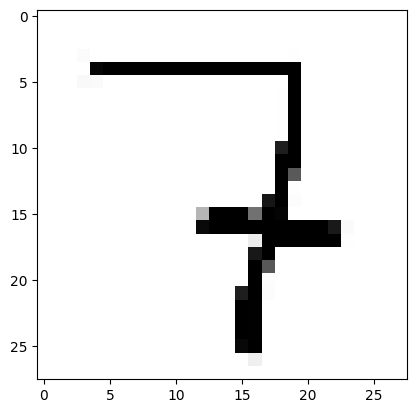

1/1 [==============================] - 0s 38ms/step
Номер класса: 2
Название класса: 2


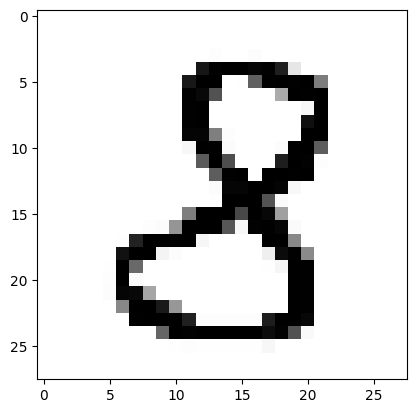

1/1 [==============================] - 0s 60ms/step
Номер класса: 8
Название класса: 8


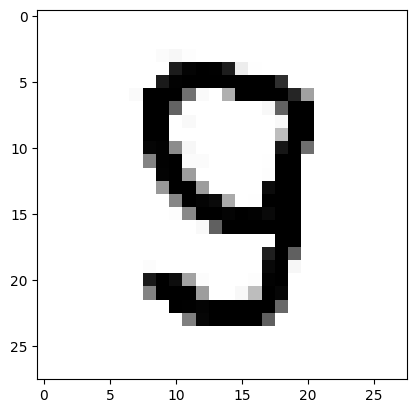

1/1 [==============================] - 0s 61ms/step
Номер класса: 8
Название класса: 8


In [ ]:
for i in range(0,10):
    img_path = str(i)+'.jpg'
    img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    plt.imshow(img.convert('RGBA'))
    plt.show()
    # Преобразуем картинку в массив
    x = image.img_to_array(img)
    # Меняем форму массива в плоский вектор
    x = x.reshape(1, 28, 28)
    # Инвертируем изображение
    x = 255 - x
    # Нормализуем изображение
    x /= 255
    prediction = model.predict(x)
    prediction = np.argmax(prediction)
    print("Номер класса:", prediction)
    print("Название класса:", classes[prediction])